In [ ]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

: 

## Excercise 1 -  Divergence problem

##### Variant A

In [ ]:
model = CmdStanModel(stan_file='stan1.stan')

In [ ]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

In [ ]:
print(result.diagnose())

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

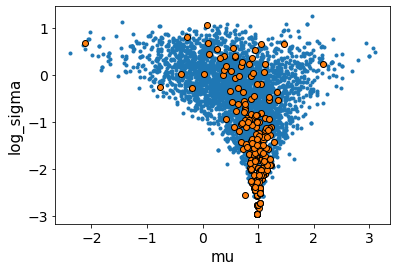

In [ ]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [ ]:
model = CmdStanModel(stan_file='stan1.stan')

In [ ]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

In [ ]:
print(result.diagnose())

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

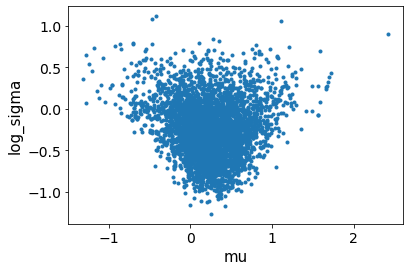

In [ ]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [ ]:
#Data read fromm coin.csv
df = pd.read_csv("coin.csv")
y = df['Toss_Result']
N = len(y)


In [ ]:
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling


NameError: name 'N' is not defined

In [ ]:
result.summary()

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

In [ ]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [ ]:
#Data read from normal.csv
#y = 
#N =


#### Posterior predictive

In [ ]:
model = CmdStanModel(stan_file='stan3.stan')

In [ ]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

In [ ]:
result.summary()

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

In [ ]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

#### Prior predictive

In [ ]:
model = CmdStanModel(stan_file='stan4.stan')

In [ ]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

In [ ]:
result.summary()

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

In [ ]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

In [ ]:
#Draw y_prior histogram
#...